# Detecting if a Text is Written in a Natural Language Using Conditional Entropy

Mikołaj Nowak 151813

## 1. Loading the Data
Let's start by importing the text corpora for various languages and samples

In [1]:
# Importing necessary libraries
import os
import math
from collections import Counter
import matplotlib.pyplot as plt

# Function to load a text file
def load_text(file_path):
    """Loads text from a given file."""
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# Defining the paths to individual files
files = {
    "english": "norm_wiki_en.txt",
    "latin": "norm_wiki_la.txt",
    "esperanto": "norm_wiki_eo.txt",
    "estonian": "norm_wiki_et.txt",
    "somali": "norm_wiki_so.txt",
    "haitian": "norm_wiki_ht.txt",
    "navaho": "norm_wiki_nv.txt",
    "samples": [f"sample{i}.txt" for i in range(6)]
}

# Loading texts into a dictionary
texts = {}
for key, file_name in files.items():
    if isinstance(file_name, list):  # If we have a list of files (samples)
        texts[key] = [load_text(f) for f in file_name]
    else:
        texts[key] = load_text(file_name)

# Checking if the files were successfully loaded
for lang, text in texts.items():
    if isinstance(text, list):  # Samples
        print(f"{lang}: {[len(sample) for sample in text]} characters per file.")
    else:
        print(f"{lang}: {len(text)} characters.")


english: 10739877 characters.
latin: 15347824 characters.
esperanto: 18619429 characters.
estonian: 9382676 characters.
somali: 5482329 characters.
haitian: 4959791 characters.
navaho: 977185 characters.
samples: [6807886, 7094404, 5510381, 6862992, 15050256, 13661663] characters per file.


## 2. Computing Entropies and Conditional Entropies for known Natural languages
In this step, the following calculations will be performed:
* Character-level entropy: Measures the uncertainty in predicting a single character.
* Word-level entropy: Measures the uncertainty in predicting a single word.
* Conditional entropies: Measure the uncertainty in predicting a character or word, given the previous ones.
These calculations will be applied to the English and Latin corpora.

In [ ]:
import matplotlib.pyplot as plt
import math
from collections import Counter

# Function to calculate conditional entropy of rank n
def calculate_conditional_entropy(data, rank):
    total = len(data)  # Total number of elements in the dataset

    # Generate n-grams of size (rank + 1) for joint entropy
    ngrams = [tuple(data[i:i + rank + 1]) for i in range(total - rank)]
    # Generate prefixes of size `rank` for marginal entropy
    prefixes = [tuple(data[i:i + rank]) for i in range(total - rank)]

    # Count occurrences for n-grams and prefixes
    ngram_count = Counter(ngrams)
    prefix_count = Counter(prefixes)

    # Calculate joint entropy H(Y, X)
    joint_entropy = -sum((freq / total) * math.log2(freq / total) for freq in ngram_count.values())

    # Calculate marginal entropy H(X)
    marginal_entropy = -sum((freq / total) * math.log2(freq / total) for freq in prefix_count.values())

    # Compute conditional entropy as H(Y|X) = H(Y, X) - H(X)
    conditional_entropy = joint_entropy - marginal_entropy
    return conditional_entropy

# Function to compute and display conditional entropy for the given language
def plot_conditional_entropy(text, language_name):
    ranks = range(7)  # Rank from 0 to 6
    characters = list(text)  # Convert text into a list of characters
    words = text.split()  # Split text into a list of words

    char_conditional_entropies = []
    word_conditional_entropies = []

    # Compute conditional entropies for characters and words for each rank
    for rank in ranks:
        char_conditional_entropy = calculate_conditional_entropy(characters, rank)
        word_conditional_entropy = calculate_conditional_entropy(words, rank)

        char_conditional_entropies.append(char_conditional_entropy)
        word_conditional_entropies.append(word_conditional_entropy)

    # Plotting the results for each language
    plt.figure(figsize=(10, 6))  # Set up the plot
    plt.plot(ranks, char_conditional_entropies, label=f"{language_name} - Characters", marker='o')
    plt.plot(ranks, word_conditional_entropies, label=f"{language_name} - Words", marker='x')

    # Adding labels and title for each language
    plt.title(f'Conditional Entropy for {language_name} (Characters and Words at Different Ranks)')
    plt.xlabel('Rank')
    plt.ylabel('Conditional Entropy (bits)')
    plt.legend()
    plt.grid(True)
    plt.show()


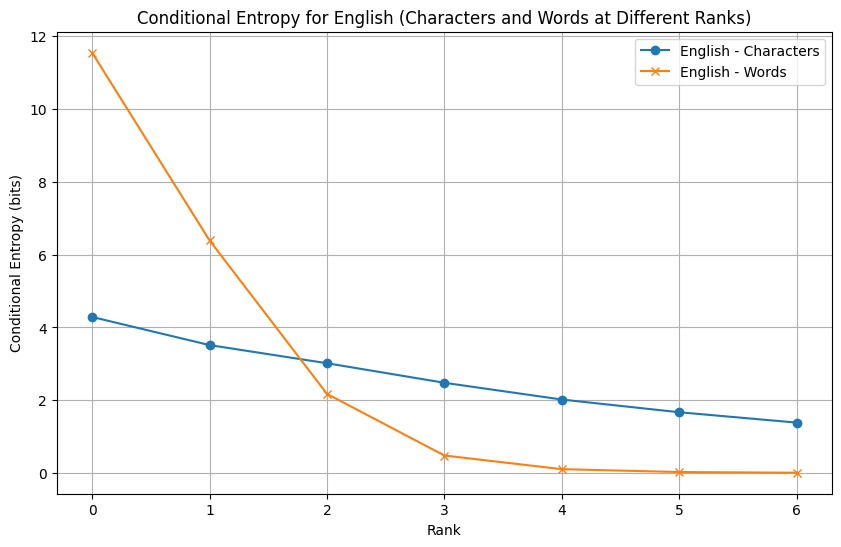

In [3]:
plot_conditional_entropy(texts['english'], 'English')

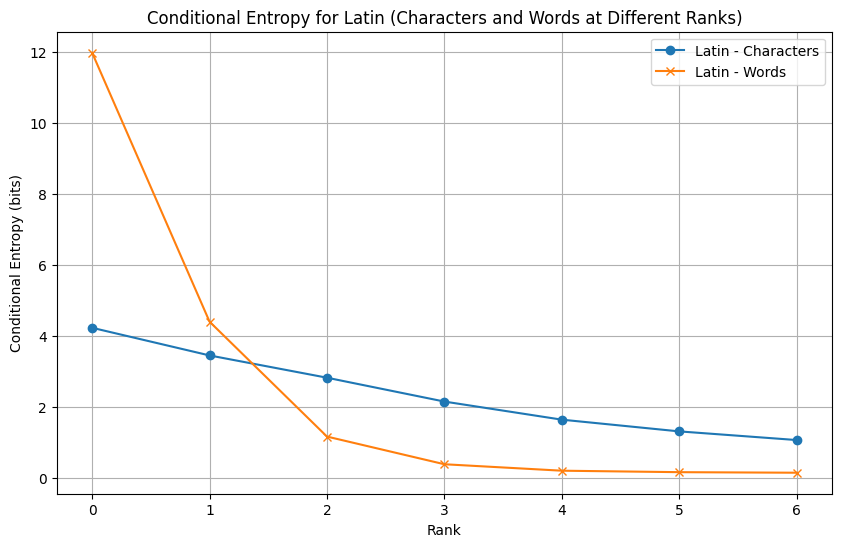

In [4]:
plot_conditional_entropy(texts['latin'], 'Latin')

# 3. Detection of Whether a Given Signal is a Natural Language

Let's calculate the conditional entropy of different ranks for the given samples and then analyze the resulting plots to determine whether the sample is likely to be a natural language.

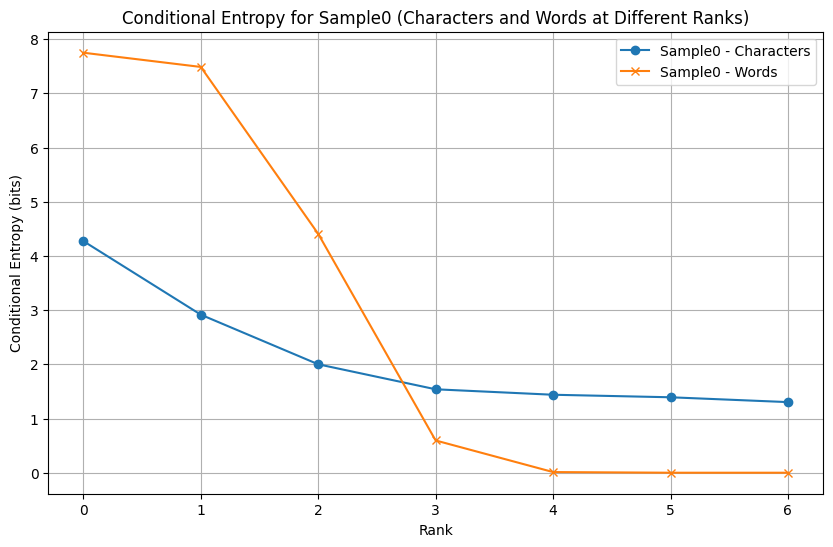

In [5]:
plot_conditional_entropy(texts['samples'][0], 'Sample0')

**Decision**: Artificial

The similar values for rank 0 and 1 in word conditional entropy suggest that we can extract almost no information from the preceding word. The later descent is likely influenced by the fact that these are just random words from a very broad (possibly uniform) distribution. As a result, for a small sample, there are only 1 or 2 occurrences of specific word n-grams, and that's why it falls to 0 so fast.

Additionally, the character conditional entropy does not fall at all for higher values, further suggesting that there may be repeated artificial words placed randomly throughout the text.

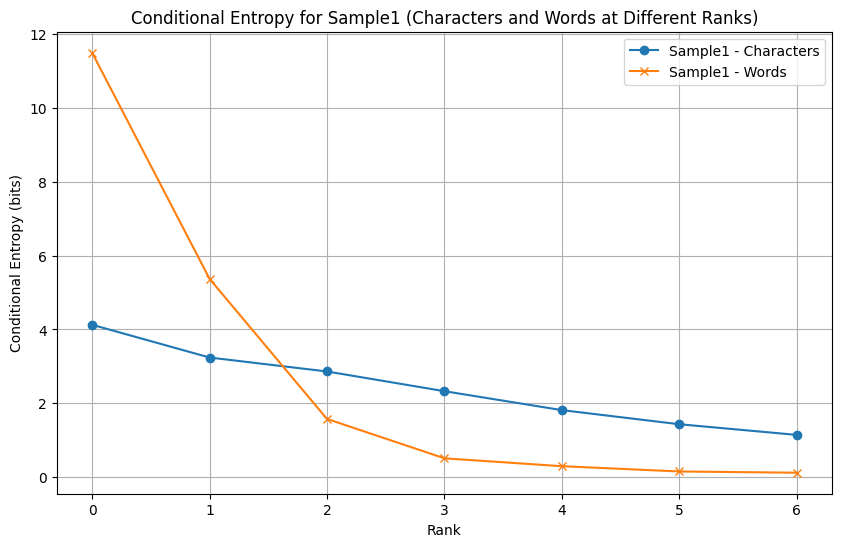

In [6]:
plot_conditional_entropy(texts['samples'][1], 'Sample1')

**Decision**: Natural

The plot exhibits a typical pattern for a natural language. The conditional entropy decreases rapidly at first and then gradually approaches 0, which is characteristic of the structure found in natural languages.

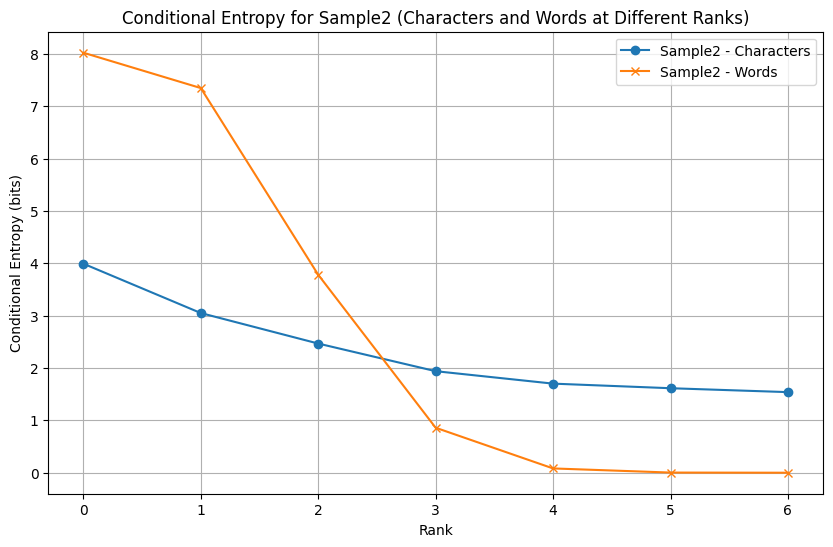

In [7]:
plot_conditional_entropy(texts['samples'][2], 'Sample2')

**Decision**: Artificial with possible real words

Very similar situation to sample0. However, in this case, the character conditional entropy continues to fall, which may indicate that these words are not just a bunch of randomly selected letters but real examples from another natural language. However, the word conditional entropy suggests that there is little or no logic or grammar in this message.


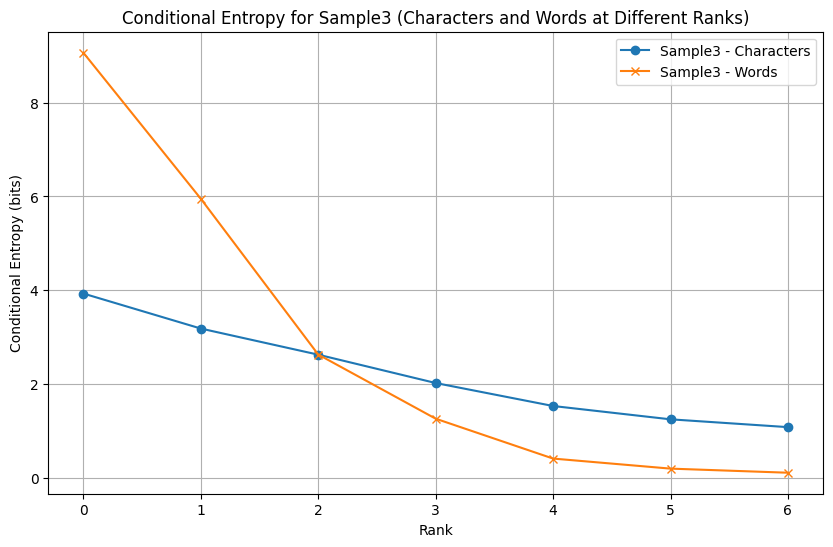

In [8]:
plot_conditional_entropy(texts['samples'][3], 'Sample3')

**Decision**: Natural

The plot exhibits a typical pattern for a natural language. The conditional entropy decreases rapidly at first and then gradually approaches 0, which is characteristic of the structure found in natural languages.

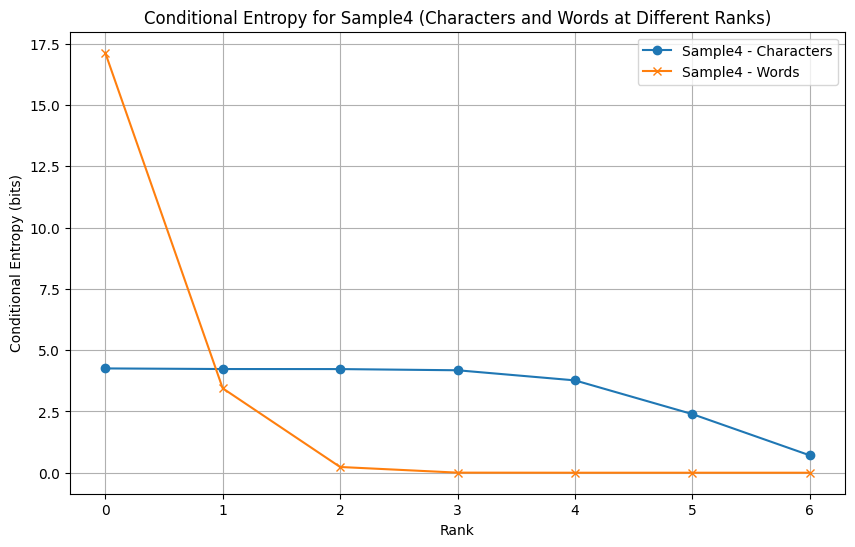

In [9]:
plot_conditional_entropy(texts['samples'][4], 'Sample4')

**Decision**: Artificial

The most artificial one of all. Words make no sense, they are just a bunch of random characters bunched together (as indicated by the almost flat plot of character conditional entropy). Moreover, the word conditional entropy falls to 0 too quickly, which further suggests that these combinations are not a product of some advanced logic.

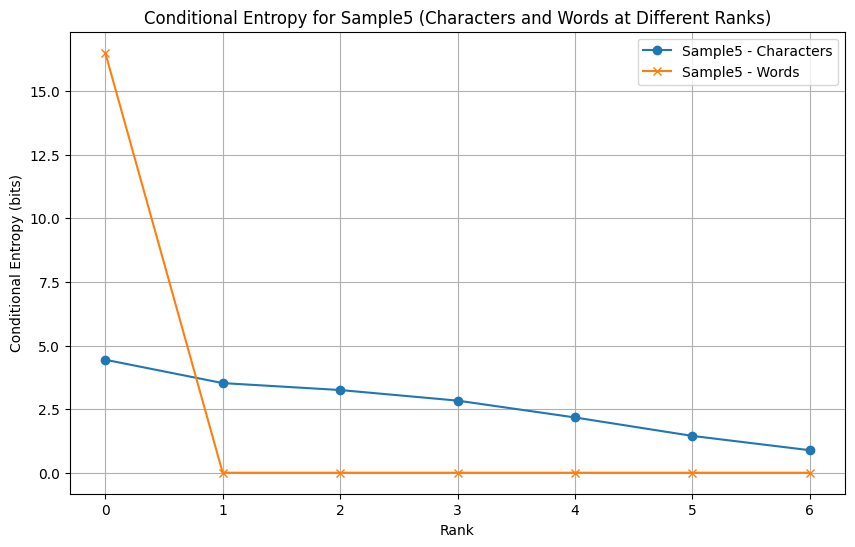

In [10]:
plot_conditional_entropy(texts['samples'][5], 'Sample5')

**Decision**: Artificial with possible real words

Very similar situation to sample2. The character conditional entropy continues to fall, which may indicate that these words are not just a bunch of randomly selected letters but real examples from another natural language. The instant drop in word conditional entropy suggests that there is little or no logic or grammar in this message.
